<a href="https://colab.research.google.com/github/yudegaki/Kaggle/blob/master/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun  2 18:00:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
cd drive/'My Drive'/J1seminar/titanic

/content/drive/My Drive/J1seminar/titanic


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
#train_data.head()

(array([[ 78.,  85.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.],
        [255.,  92.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.],
        [732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 3 Lists of Patches objects>)

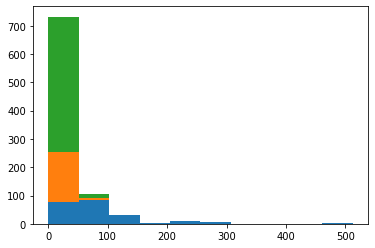

In [5]:
# pclassとfareの関係の解析
pclass_fare = [train_data.loc[train_data.Pclass == i + 1].Fare for i in range(3)]
pclass_labels = ['Death','Survived']
plt.hist(pclass_fare,histtype = 'barstacked',label = pclass_labels)

pclass_0's Survived rate : 0.6296296296296297
pclass_1's Survived rate : 0.47282608695652173
pclass_2's Survived rate : 0.24236252545824846


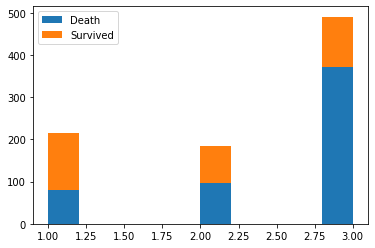

In [6]:
# Pclassによる生存者数の解析

pclass = [train_data.loc[train_data.Pclass == i + 1] for i in range(3)]
rate_pclass = [len(pclass[i][pclass[i].Survived == 1]) / len(pclass[i]) for i in range(3)]

for i in range(len(rate_pclass)):
    print(f"pclass_{i}'s Survived rate : {rate_pclass[i]}")

plot_pclass = [train_data.loc[train_data.Survived == i].Pclass for i in range(2)]
pclass_labels = ['Death','Survived']
plt.hist(plot_pclass,histtype = 'barstacked',label = pclass_labels)
plt.legend()

0 <= age < 5 's Survived rate : 0.675
5 <= age < 10 's Survived rate : 0.5
10 <= age < 15 's Survived rate : 0.4375
15 <= age < 20 's Survived rate : 0.3953488372093023
20 <= age < 25 's Survived rate : 0.34210526315789475
25 <= age < 30 's Survived rate : 0.3584905660377358
30 <= age < 35 's Survived rate : 0.42105263157894735
35 <= age < 40 's Survived rate : 0.4583333333333333
40 <= age < 45 's Survived rate : 0.375
45 <= age < 50 's Survived rate : 0.3902439024390244
50 <= age < 55 's Survived rate : 0.4375
55 <= age < 60 's Survived rate : 0.375
60 <= age < 65 's Survived rate : 0.4
65 <= age < 70 's Survived rate : 0.0
70 <= age < 75 's Survived rate : 0.0
75 <= age < 80 's Survived rate : 0.0
80 <= age < 85 's Survived rate : 1.0
85 <= age < 90 's Survived rate : 0.0
90 <= age < 95 's Survived rate : 0.0
95 <= age < 100 's Survived rate : 0.0


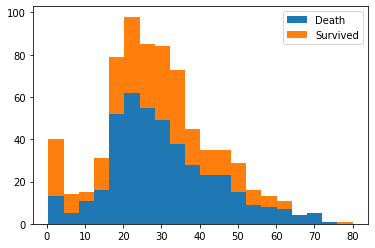

In [7]:
# Ageによる生存者数の解析( range_age 歳ごとに分類)

range_age = 5

split_age = [train_data.loc[(train_data.Age >= (i) * range_age) & (train_data.Age < (i + 1) * range_age)] for i in range(int(100 / range_age))]
rate_age = [len(split_age[i][split_age[i].Survived == 1]) / max(1,len(split_age[i])) for i in range(int(100 / range_age))]

for i in range(len(rate_age)):
    print(f"{i * range_age} <= age < {(i + 1) * range_age} 's Survived rate : {rate_age[i]}")

plot_age = [train_data.loc[train_data.Survived == i].Age for i in range(2)]
age_labels = ['Death','Survived']
plt.hist(plot_age,histtype = 'barstacked',bins=int(100/range_age),label = age_labels)
plt.legend()

0 family's rate :0.30353817504655495
1 family's rate :0.5527950310559007
2 family's rate :0.5784313725490197
3 family's rate :0.7241379310344828
4 family's rate :0.2
5 family's rate :0.13636363636363635
6 family's rate :0.3333333333333333
7 family's rate :0.0
8 family's rate :0.0
9 family's rate :0.0


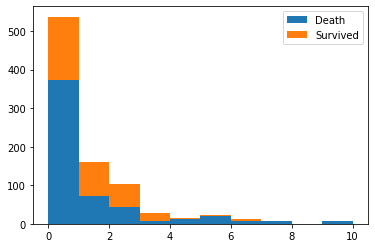

In [8]:
# SibSp + Parch 同乗している家族の数での解析
train_data['Family'] = train_data.SibSp + train_data.Parch 
split_family = [train_data.loc[(train_data.Family == i)] for i in range(10)]
rate_family = [len(split_family[i][split_family[i].Survived == 1]) / max(1,len(split_family[i])) for i in range(10)]
for i in range(len(rate_family)):
    print(f"{i} family's rate :{rate_family[i]}")

plot_age = [train_data.loc[train_data.Survived == i].Family for i in range(2)]
age_labels = ['Death','Survived']
plt.hist(plot_age,histtype = 'barstacked',label = age_labels)
plt.legend()

In [9]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% of women who survived:",rate_women)

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% of men who survived:",rate_men)


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [0]:
#データの変数
# PassengerId そのまま
# Survived 生存しているか(1 == True)
# Pclass チケットのランク(1 > 2 > 3)
# Name そのまま
# Sex そのまま
# Age そのまま
# SibSp 同乗している(兄弟||配偶者)の数
# Parch 同乗している(親||子供)の数
# SibSp + Parch 同乗している家族の数
# Ticket チケット番号
# Fare 料金
# Cabin 客室番号
# Embarked 出港地

# train_data.head()
# test_data.head()

In [0]:
#データの前処理
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
test_data['Family'] = test_data['SibSp'] + test_data['Parch']

In [0]:
#データの前処理その1


#名前が同じかつ、Familyが同じ場合は、同じ年齢付近であると推測できる(この際、配偶者数が一致していることも条件に加える)
# データ数が少ないため、全探索を行う
def guess_age(data,index):   
    #とりあえず、年齢がNaNのデータの名前の中に以下のものがあったため、除く
    guess_name = data['Name'][index].replace('Master.','').replace('Dr.','').replace('Miss.','').replace('Mrs.','').replace('Mr.','').replace('Ms.','').split()
    
    ret = 0
    all = np.array(data['Age'])
    all = all[~np.isnan(all)]
    age = np.array([])
    tmp = np.array([])
    # 名前の一部が同じ && 同じ家族構成 && 同じチケットランクのものを 
    for i in range(len(data)):
        for name in guess_name:
            if (name in data['Name'][i]) and not(np.isnan(data['Age'][i])):
                if (data['Family'][index] == data['Family'][i]) and (data['SibSp'][index] == data['SibSp'][i]):
                    if(data['Pclass'][index] == data['Pclass'][i]):
                        age = np.append(age,np.array([data['Age'][i]]))
                    else:
                        tmp = np.append(tmp,np.array([data['Age'][i]]))

    if len(age) != 0:
        ret = age.mean()
    elif len(tmp) != 0:
        ret = tmp.mean()
    else:
        ret = all.mean()

    return ret


for i in range(len(train_data.Age)):
    # EmbarkedのnanをSにする(この処理は改善予定)
    if not(type(train_data['Embarked'][i]) is str):
        train_data.loc[i,'Embarked'] = 'S'
    if np.isnan(train_data['Age'][i]):
        train_data.loc[i,'Age'] = guess_age(train_data,i)

for i in range(len(test_data.Age)):
    if not(type(test_data['Embarked'][i]) is str):
        test_data.loc[i,'Embarked'] = 'S'
    if np.isnan(test_data['Age'][i]):
        test_data.loc[i,'Age'] = guess_age(test_data,i)



In [13]:
#RandomForest

y = train_data["Survived"]

features = ["Pclass","Sex","Family","Age","Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
